# Rigs Question 1: Some viles required for preprocessing have been excluded as they require more thatn 100 mb space 

## What are the trends regarding student housing across the city, by district, e.g. what % of the rental housing is taken up by students for each district and how has this changed over time?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re




In [2]:
boston_wards = {
    1: "East Boston",
    2: "Charlestown",
    3: "North End, West End, Financial District, Chinatown",
    4: "Fenway, South End, Back Bay",
    5: "Back Bay, Beacon Hill",
    6: "South Boston",
    7: "South Boston, Dorchester",
    8: "South End, Roxbury",
    9: "South End, Roxbury",
    10: "Mission Hill",
    11: "Roxbury, Jamaica Plain",
    12: "Roxbury",
    13: "Dorchester, Savin Hill",
    14: "North Dorchester, Mattapan",
    15: "Dorchester, Meeting Hill House",
    16: "Dorchester (Neponset Cedar Grove)",
    17: "Dorchester (Lower Mills)",
    18: "Hyde Park, Mattapan",
    19: "Jamaica Plain, Roslindale",
    20: "West Roxbury",
    21: "Allston, Brighton",
    22: "Unknown or Newer Areas"
}

In [3]:
# Load data, ready for cleaning and drop obvious not needed columsn 
df = pd.read_csv('StudentAddresses(UP).csv', low_memory=False)
df = df.drop(columns=['6d. unit #'])
df = df.drop(columns=['9. at-home or not-at-home'])
df['full_address'] = df['6a. street #'].astype(str) + ' ' + \
                     df['6b. street name'] + ' ' + \
                     df['6c. street suffix'] + ', ' + \
                     df['6e. zip'].astype(str)
df['full_address'] = df['6a. street #'].astype(str) + ' ' + \
                     df['6b. street name'] + ' ' + \
                     df['6c. street suffix']
                     


# dropping the NaN values: 
df_cleaned = df.dropna(subset=['full_address']).reset_index(drop=True)

# Filtered out data ready for district assingment: 

book = df_cleaned
book['street_number'] = pd.to_numeric(book['6a. street #'], errors='coerce')
book['street_name'] = (book['6b. street name'] + ' ' + book['6c. street suffix']).str.lower().str.strip()
book.head(100)





,6a. street #,6b. street name,6c. street suffix,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. 5 or more undergrads/unit (y/n),university,year,full_address,street_number,street_name
0,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st
1,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st
2,1189,Commonwealth,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,1189 Commonwealth AVE,1189.0,commonwealth ave
3,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave
4,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,Queensberry,ST,2215,U,FT,NaN,Emmanuel College,2018-2019,58 Queensberry ST,58.0,queensberry st
96,58,Queensbury,ST,2215,U,FT,NaN,Emmanuel College,2018-2019,58 Queensbury ST,58.0,queensbury st
97,660,Washington,ST,2111,U,FT,NaN,Emmanuel College,2018-2019,660 Washington ST,660.0,washington st
98,660,Washington,ST,2111,U,FT,NaN,Emmanuel College,2018-2019,660 Washington ST,660.0,washington st


### Ward assignment



In [4]:
## Exmapnstion of location to get full set for comparison

lookup_df = pd.read_csv('../location.csv')
lookup_df.head()
count = 0

expanded_rows = []  # sotre the new row
error_rows = [] # store the error rows

for _, row in lookup_df.iterrows():
    if row['IS_RANGE'] == 1:
        # integer conversion of rows range
        try:
            range_from = int(float(row['RANGE_FROM']))
            range_to = int(float(row['RANGE_TO']))
        except ValueError:
            # print(row["RANGE_FROM"], row["RANGE_TO"])
            count += 1
            error_rows.append(row)
            continue  # invalid range indexing
        
        # enumerate through the entire range and create rows for each number
        for num in range(range_from, range_to + 1):
            new_row = row.copy()
            new_row['STREET_NUMBER'] = str(num)
            new_row['FULL_ADDRESS'] = f"{num} {row['FULL_STREET_NAME']}"
            expanded_rows.append(new_row)
    else:
        # if not a range, just append the row as-is
        expanded_rows.append(row)

# Convert the expanded rows back into a DataFrame
expanded_lookup_df = pd.DataFrame(expanded_rows).reset_index(drop=True)
print("The error count is: ", count)

# Standardize street number and full street name to create a properly formatted address
expanded_lookup_df['actual_address'] = expanded_lookup_df['STREET_NUMBER'].astype(str) + ' ' + expanded_lookup_df['FULL_STREET_NAME']

expanded_lookup_df.head(100)


## PS: there are a total of 2591 range errors since they are not indexed with integers the are stored in the error_rows list.
## This error_list will also be checked to see if they are in the error list or not. If problems occrs other wise this list will remain unconsulted. 



/var/folders/vt/h6zk5t3106dgbrm4lvpjm5x40000gn/T/ipykernel_78572/1595117873.py:3: DtypeWarning: Columns (6,7,15,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  lookup_df = pd.read_csv('../location.csv')


The error count is:  2591


,SAM_ADDRESS_ID,BUILDING_ID,RELATIONSHIP_TYPE,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,UNIT,FULL_STREET_NAME,...,Y_COORD,SAM_STREET_ID,WARD,PARCEL,created_date,last_edited_date,shape_wkt,POINT_X,POINT_Y,actual_address
0,1,100778,1,6 A St,6,1,6,10,NaN,A St,...,2.916575e+06,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,6 A St
1,1,100778,1,7 A St,7,1,6,10,NaN,A St,...,2.916575e+06,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,7 A St
2,1,100778,1,8 A St,8,1,6,10,NaN,A St,...,2.916575e+06,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,8 A St
3,1,100778,1,9 A St,9,1,6,10,NaN,A St,...,2.916575e+06,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,9 A St
4,1,100778,1,10 A St,10,1,6,10,NaN,A St,...,2.916575e+06,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,10 A St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,175978,1,82 A St,82,1,80,82,NaN,A St,...,2.950124e+06,2,6,0601197010,9/25/2009 10:14:59,2/10/2022 10:47:28,POINT (-71.055069999999944 42.342429999000046),-71.055070,42.342430,82 A St
96,57,175978,2,80 A St 5,80,0,NaN,NaN,5,A St,...,2.950124e+06,2,6,0601197010,9/25/2009 10:14:59,2/10/2022 10:47:29,POINT (-71.055069999999944 42.342429999000046),-71.055070,42.342430,80 A St
97,58,175978,2,80 A St 6,80,0,NaN,NaN,6,A St,...,2.950124e+06,2,6,0601197010,9/25/2009 10:14:59,2/10/2022 10:47:29,POINT (-71.055069999999944 42.342429999000046),-71.055070,42.342430,80 A St
98,59,180953,1,84 A St,84,1,84,90,NaN,A St,...,2.950165e+06,2,6,0601228000,9/25/2009 10:14:59,2/10/2022 10:47:29,POINT (-71.054845999999941 42.34254099900005),-71.054846,42.342541,84 A St


In [5]:
book.head()

,6a. street #,6b. street name,6c. street suffix,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. 5 or more undergrads/unit (y/n),university,year,full_address,street_number,street_name
0,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st
1,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st
2,1189,Commonwealth,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,1189 Commonwealth AVE,1189.0,commonwealth ave
3,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave
4,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave


In [8]:
book['real_address'] = (
    book['6a. street #'].astype(str)  # Convert street number to string
    + book['6b. street name'].fillna('').astype(str)  # Ensure street name is included
    + book['6c. street suffix'].fillna('').astype(str)  # Ensure street suffix is included
)

# Normalize by removing spaces, full stops, and converting to lowercase
book['real_address'] = (
    book['real_address']
    .str.replace(r'\s+', '', regex=True)  # Remove all spaces
    .str.replace(r'\.$', '', regex=True)  # Remove trailing full stops
    .str.lower()  # Convert to lowercase
)

print(book[['6a. street #', '6b. street name', '6c. street suffix', 'real_address']].head(10))

  6a. street # 6b. street name 6c. street suffix         real_address
0           10         Higgins                ST          10higginsst
1           10         Higgins                ST          10higginsst
2         1189    Commonwealth               AVE  1189commonwealthave
3           12       Glenville               AVE       12glenvilleave
4           12       Glenville               AVE       12glenvilleave
5           12        Saunders                ST         12saundersst
6         1251    Commonwealth               AVE  1251commonwealthave
7           17        Highgate                ST         17highgatest
8           28          Linden                ST           28lindenst
9           28           Quint               AVE           28quintave


In [9]:
book['real_address'] = book['real_address'].astype(str).str.strip().str.lower().str.replace(r'\s+', '', regex=True)
# Create actual_address by concatenating street_number and full_street_name properly
# Ensure we include the actual street name (STREET_BODY)
expanded_lookup_df['actual_address'] = (
    expanded_lookup_df['STREET_NUMBER'].astype(str)  # Convert street number to string
    + expanded_lookup_df['STREET_PREFIX'].fillna('').str.replace(r'\s+', '', regex=True)  # Remove spaces
    + expanded_lookup_df['STREET_BODY'].fillna('').str.replace(r'\s+', '', regex=True)  # Include actual street name!
    + expanded_lookup_df['STREET_FULL_SUFFIX'].fillna('').str.replace(r'\s+', '', regex=True)  # Remove spaces
).str.lower()  # Convert everything to lowercase
expanded_lookup_df['actual2_address'] = (
    expanded_lookup_df['STREET_NUMBER'].astype(str)  # Convert street number to string
    + expanded_lookup_df['STREET_PREFIX'].fillna('').str.replace(r'\s+', '', regex=True)  # Remove spaces
    + expanded_lookup_df['STREET_BODY'].fillna('').str.replace(r'\s+', '', regex=True)  # Include actual street name!
    + expanded_lookup_df['STREET_SUFFIX_ABBR'].fillna('').str.replace(r'\s+', '', regex=True)  # Remove spaces
).str.lower()  # Convert everything to lowercase
expanded_lookup_df.head(100)


,SAM_ADDRESS_ID,BUILDING_ID,RELATIONSHIP_TYPE,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,UNIT,FULL_STREET_NAME,...,SAM_STREET_ID,WARD,PARCEL,created_date,last_edited_date,shape_wkt,POINT_X,POINT_Y,actual_address,actual2_address
0,1,100778,1,6 A St,6,1,6,10,NaN,A St,...,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,6astreet,6ast
1,1,100778,1,7 A St,7,1,6,10,NaN,A St,...,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,7astreet,7ast
2,1,100778,1,8 A St,8,1,6,10,NaN,A St,...,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,8astreet,8ast
3,1,100778,1,9 A St,9,1,6,10,NaN,A St,...,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,9astreet,9ast
4,1,100778,1,10 A St,10,1,6,10,NaN,A St,...,1,18,1809309000,9/25/2009 10:14:59,10/25/2017 14:04:04,POINT (-71.125035941999954 42.250617902000045),-71.125036,42.250618,10astreet,10ast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,175978,1,82 A St,82,1,80,82,NaN,A St,...,2,6,0601197010,9/25/2009 10:14:59,2/10/2022 10:47:28,POINT (-71.055069999999944 42.342429999000046),-71.055070,42.342430,82astreet,82ast
96,57,175978,2,80 A St 5,80,0,NaN,NaN,5,A St,...,2,6,0601197010,9/25/2009 10:14:59,2/10/2022 10:47:29,POINT (-71.055069999999944 42.342429999000046),-71.055070,42.342430,80astreet,80ast
97,58,175978,2,80 A St 6,80,0,NaN,NaN,6,A St,...,2,6,0601197010,9/25/2009 10:14:59,2/10/2022 10:47:29,POINT (-71.055069999999944 42.342429999000046),-71.055070,42.342430,80astreet,80ast
98,59,180953,1,84 A St,84,1,84,90,NaN,A St,...,2,6,0601228000,9/25/2009 10:14:59,2/10/2022 10:47:29,POINT (-71.054845999999941 42.34254099900005),-71.054846,42.342541,84astreet,84ast


In [11]:
address_to_ward = expanded_lookup_df.set_index('actual_address')['WARD'].to_dict()
address2_to_ward = expanded_lookup_df.set_index('actual2_address')['WARD'].to_dict()
book['real_address'] = book['real_address'].str.rstrip('.')
# Fast mapping using dictionary lookup (O(1) time complexity per lookup)
print(list(address_to_ward.keys())[:20])  # Print first 20 keys
print("Expected Key:", book['real_address'].iloc[0])  # Print first address from book

['6astreet', '7astreet', '8astreet', '9astreet', '10astreet', '15astreet', '172astreet', '173astreet', '174astreet', '176astreet', '177astreet', '178astreet', '21astreet', '232astreet', '249astreet', '250astreet', '251astreet', '252astreet', '253astreet', '254astreet']
Expected Key: 10higginsst


In [12]:
book['ward'] = book['real_address'].map(address_to_ward)
# Second mapping: Only update where ward is still NaN
book['ward'] = book['ward'].fillna(book['real_address'].map(address2_to_ward))
book.head()

,6a. street #,6b. street name,6c. street suffix,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. 5 or more undergrads/unit (y/n),university,year,full_address,street_number,street_name,real_address,ward
0,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st,10higginsst,21.0
1,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st,10higginsst,21.0
2,1189,Commonwealth,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,1189 Commonwealth AVE,1189.0,commonwealth ave,1189commonwealthave,21.0
3,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave,12glenvilleave,21.0
4,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave,12glenvilleave,21.0


In [13]:

book.to_csv("book_with_wards.csv", index=False)
expanded_lookup_df.to_csv("expanded_lookup.csv", index=False)
book.head(100)


,6a. street #,6b. street name,6c. street suffix,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. 5 or more undergrads/unit (y/n),university,year,full_address,street_number,street_name,real_address,ward
0,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st,10higginsst,21.0
1,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st,10higginsst,21.0
2,1189,Commonwealth,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,1189 Commonwealth AVE,1189.0,commonwealth ave,1189commonwealthave,21.0
3,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave,12glenvilleave,21.0
4,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave,12glenvilleave,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,Queensberry,ST,2215,U,FT,NaN,Emmanuel College,2018-2019,58 Queensberry ST,58.0,queensberry st,58queensberryst,5.0
96,58,Queensbury,ST,2215,U,FT,NaN,Emmanuel College,2018-2019,58 Queensbury ST,58.0,queensbury st,58queensburyst,NaN
97,660,Washington,ST,2111,U,FT,NaN,Emmanuel College,2018-2019,660 Washington ST,660.0,washington st,660washingtonst,17.0
98,660,Washington,ST,2111,U,FT,NaN,Emmanuel College,2018-2019,660 Washington ST,660.0,washington st,660washingtonst,17.0


# Further Processing 


In [14]:
# Drop rows where 'ward' is NaN (missing ward assignments)
book = book.dropna(subset=['ward']).reset_index(drop=True)
book['ward_name'] = book['ward'].astype(int).map(boston_wards)
book.to_csv("book_with_wards.csv", index=False)
expanded_lookup_df.to_csv("expanded_lookup.csv", index=False)
book.head()

,6a. street #,6b. street name,6c. street suffix,6e. zip,7. undergraduate (u) or graduate (g),8. full-time (ft) or part-time (pt),9. 5 or more undergrads/unit (y/n),university,year,full_address,street_number,street_name,real_address,ward,ward_name
0,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st,10higginsst,21.0,"Allston, Brighton"
1,10,Higgins,ST,2134,U,FT,NaN,Emmanuel College,2018-2019,10 Higgins ST,10.0,higgins st,10higginsst,21.0,"Allston, Brighton"
2,1189,Commonwealth,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,1189 Commonwealth AVE,1189.0,commonwealth ave,1189commonwealthave,21.0,"Allston, Brighton"
3,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave,12glenvilleave,21.0,"Allston, Brighton"
4,12,Glenville,AVE,2134,U,FT,NaN,Emmanuel College,2018-2019,12 Glenville AVE,12.0,glenville ave,12glenvilleave,21.0,"Allston, Brighton"


### First job is to cluster the people together of the same district: (Given Book is ready:)


   ward  year  student_units
0     1  2016            734
1     1  2017            883
2     1  2018            896
3     1  2019            958
4     1  2020            944


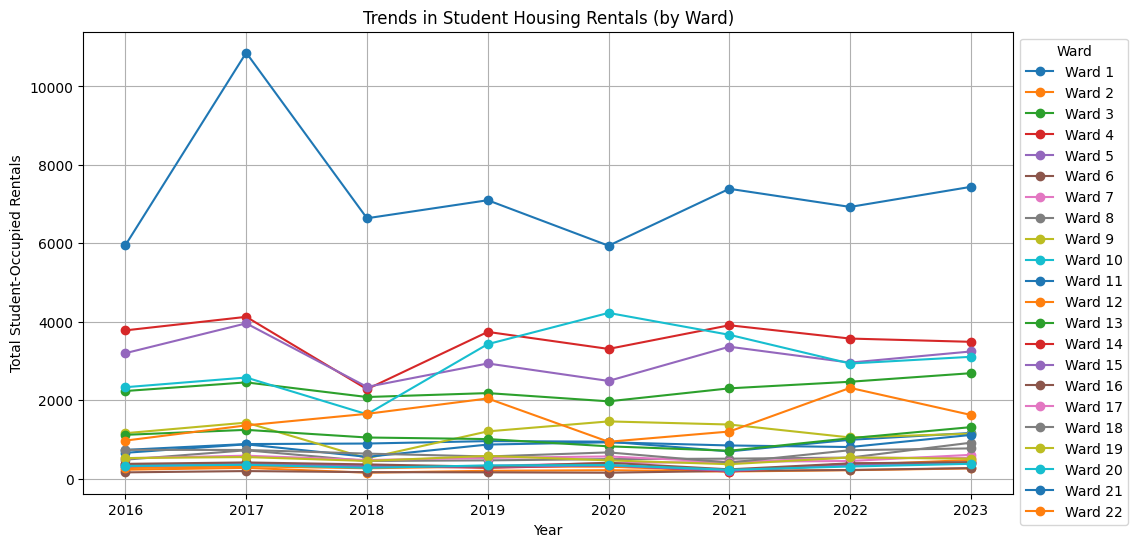

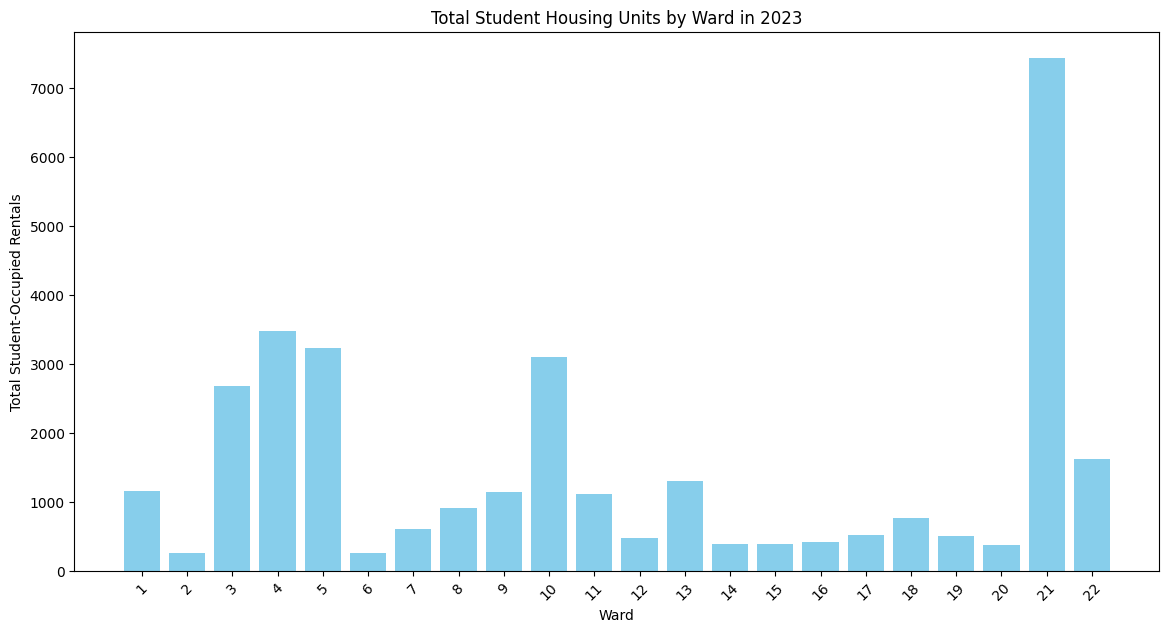

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ward and year are properly formatted
book['ward'] = book['ward'].astype(int)
book['year'] = book['year'].astype(str).str.extract(r'(\d{4})').astype(int)  # Extract only the start year

# Calculate student housing trends
student_housing_trends = book.groupby(['ward', 'year']).size().reset_index(name='student_units')

# Display DataFrame
print(student_housing_trends.head())

# 🔹 **Visualization: Line Plot for Student Housing Trends (Total Units)**
plt.figure(figsize=(12, 6))
for ward in student_housing_trends['ward'].unique():
    subset = student_housing_trends[student_housing_trends['ward'] == ward]
    plt.plot(subset['year'], subset['student_units'], marker='o', label=f'Ward {ward}')
plt.xlabel("Year")
plt.ylabel("Total Student-Occupied Rentals")
plt.title("Trends in Student Housing Rentals (by Ward)")
plt.legend(title="Ward", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# 🔹 **Visualization: Bar Chart for Latest Year Student Housing by Ward**
plt.figure(figsize=(14, 7))
latest_year = student_housing_trends['year'].max()
latest_data = student_housing_trends[student_housing_trends['year'] == latest_year]
plt.bar(latest_data['ward'].astype(str), latest_data['student_units'], color='skyblue')

plt.xlabel("Ward")
plt.ylabel("Total Student-Occupied Rentals")
plt.title(f"Total Student Housing Units by Ward in {latest_year}")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Normalize full_address and actual_address: lowercase + remove all spaces


We are going to first start by converting our address into 